# Importing all the Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Loading The DataSet

In [35]:
data=pd.read_csv(r'C:\Users\aalme\python folder\Russia Vs Ukraine Tweets Dataset.csv')

In [36]:
data.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.546680e+18,1.546640e+18,2022-07-12 02:14:37 UTC,12-07-2022,02:14:37,0,8.032270e+08,mutex7,David Gondek,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'notausername12', 'name': 'no...",NaN,NaN,NaN,NaN
1,1.546680e+18,1.546670e+18,2022-07-12 02:14:30 UTC,12-07-2022,02:14:30,0,1.021470e+18,timcrow68661485,Tim Crowley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MarkHertling', 'name': 'Mark...",NaN,NaN,NaN,NaN
2,1.546680e+18,1.546660e+18,2022-07-12 02:14:29 UTC,12-07-2022,02:14:29,0,5.801442e+08,la_kings_67,Chuck Leek,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'propornot', 'name': 'PropOrN...",NaN,NaN,NaN,NaN
3,1.546680e+18,1.546680e+18,2022-07-12 02:14:28 UTC,12-07-2022,02:14:28,0,1.025760e+18,ottenbergeve,Eve Ottenberg,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.546680e+18,1.546680e+18,2022-07-12 02:14:26 UTC,12-07-2022,02:14:26,0,1.469390e+18,ds_1911,Restoring Our Republic ❤️🇺🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [37]:
data.shape

(10016, 36)

In [38]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [39]:
data.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [40]:
# We are only interested in username,twwets,language

In [46]:
data= data[["username","tweet","language"]]

In [47]:
data.head()

,username,tweet,language
0,mutex7,@notausername12 And what happens the day after...,en
1,timcrow68661485,@MarkHertling Serious question and I fully do ...,en
2,la_kings_67,@propornot @anonbergine That's a GERMAN story....,en
3,ottenbergeve,Europe never learns. As it shivers in fear tha...,en
4,ds_1911,Keep blaming Russia,en


# Checking for any missing values

In [48]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [49]:
data["language"].value_counts()

en     8856
pt      610
it      148
qme      66
in       58
es       42
und      41
ru       33
ca       19
ja       17
vi       16
zh       16
qht      10
fi        8
fr        8
tl        6
pl        5
qam       5
hi        5
ko        5
ro        4
zxx       4
de        4
tr        3
ur        3
sv        3
th        3
nl        3
cs        3
ht        3
ar        2
da        1
si        1
uk        1
fa        1
ta        1
no        1
am        1
Name: language, dtype: int64

# Most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis.
Here I will remove all the links, punctuation, symbols and other language errors from the tweets.


In [52]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aalme\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [53]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war.

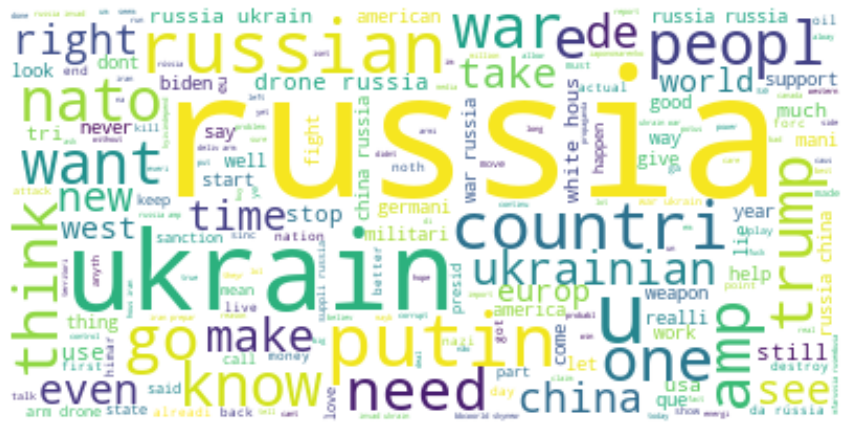

In [54]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets.



In [55]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aalme\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0   happen day exhaust end russia isnt go anywher...     0.000     0.187   
1  markhertl serious question fulli expect repli ...     0.000     0.051   
2  propornot anonbergin that german stori reflect...     0.061     0.000   
3  europ never learn shiver fear russia may shut ...     0.122     0.181   
4                                  keep blame russia     0.000     0.545   

   Neutral  
0    0.813  
1    0.949  
2    0.939  
3    0.697  
4    0.455  


Now let’s have a look at the most frequent words used by people with positive sentiments.

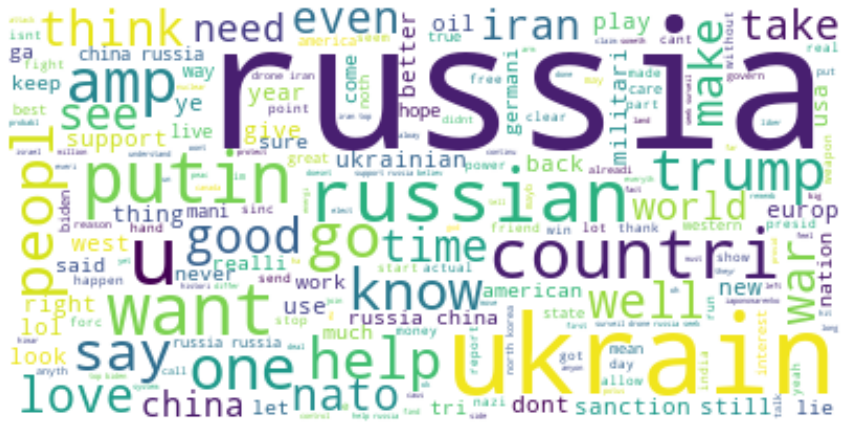

In [56]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments.

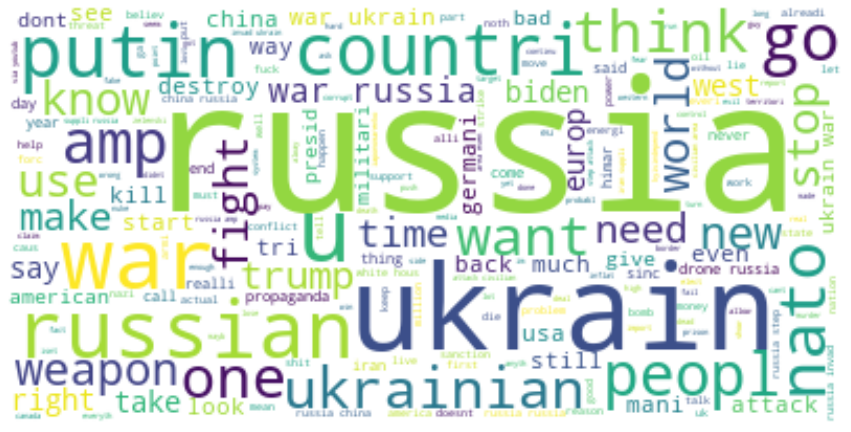

In [59]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()